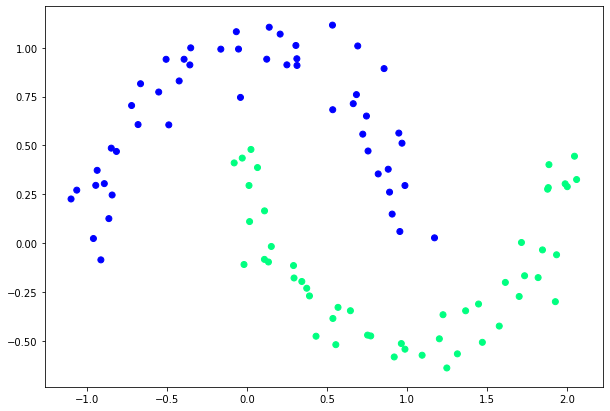

In [11]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Creating a dataset with non linear aspect
np.random.seed(0)
feature_set, labels = datasets.make_moons(100, noise=0.10)
plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)

# These are the zeros or ones to dataset output
labels = labels.reshape(100, 1)

# Defining an activation function and its derivative
def sigmoid(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def sigmoid_der(x):
    return 1-np.power(sigmoid(x),2)

# Starting with random wheigths for the hiden layer and for the output
wh = np.random.rand(len(feature_set[0]), 20)
wo = np.random.rand(20, 1)

# The learning rate to the gradiend descent
lr = 0.01

# epoch loop for the learning
for epoch in range(100000):
    # Calculating the neuron values at hiden layer
    zh = np.dot(feature_set, wh)
    nh = sigmoid(zh)
    dzh = sigmoid_der(zh)
    # Calculating the neuron values at the output
    zo = np.dot(nh, wo)
    no = sigmoid(zo)
    dzo = sigmoid_der(zo)
    # Phase1 =======================
    error_out = ((1 / 2) * (np.power((no - labels), 2)))
    #print(error_out.sum())
    error = no - labels
    dcost_au = np.dot(error * dzo, wo.T)
    dcost_wh = np.dot(feature_set.T, dzh * dcost_au)
    dcost_wo = np.dot(nh.T, error * dzo)
    # Update Weights ================
    wo -= lr * dcost_wo
    wh -= lr * dcost_wh

In [12]:
def predmap(x,y):
    # Calculating the neuron values at hiden layer
    zh = np.dot(np.array([x,y]), wh)
    nh = sigmoid(zh)
    # Calculating the neuron values at the output
    zo = np.dot(nh, wo)
    no = sigmoid(zo)
    if (no <= 0.1):
        color = 'blue'
    elif (no >= 0.9):
        color = 'green'
    else:
        color = 'Eu não sei'
    return color

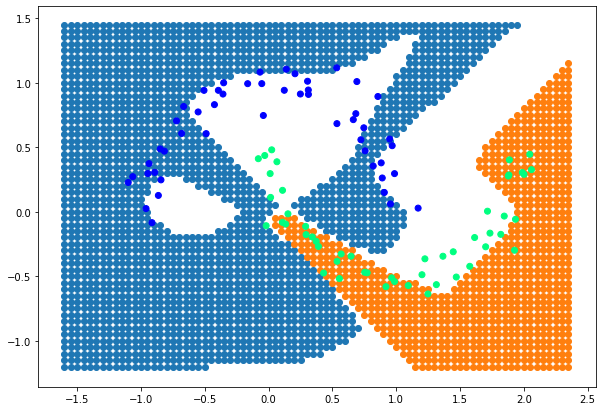

In [13]:
blue = []
green = []
for i in np.arange(-1.6, 2.4, 0.05):
    for j in np.arange(-1.2, 1.5, 0.05):
        color = predmap(i,j)
        
        if color == 'green':
            green.append([i, j])
        elif color == 'blue':
            blue.append([i, j])
        
blue = np.array(blue)
green = np.array(green)

# Creating a dataset with non linear aspect
np.random.seed(0)
feature_set, labels = datasets.make_moons(100, noise=0.10)
plt.figure(figsize=(10,7))
plt.scatter(list(blue[:,0]), list(blue[:,1]))
plt.scatter(list(green[:,0]), list(green[:,1]))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)